In [23]:
norm = data[data['sentiment']=="normal"]
print(norm.shape)

tweets_text_len = tweets['tweet'].str.len()
print("The maximum lenght of string in NORMAL class is {} words".format(max(tweets_text_len)))
print("The minimum lenght of string in NORMAL class is {} words".format(min(tweets_text_len)))

(661, 7)
The maximum lenght of string in NORMAL class is 109 words
The minimum lenght of string in NORMAL class is 8 words


In [22]:
#tokenization = splitting up a larger body of text into smaller lines, words 

def tokenize_and_stop_words(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words
tweets['tweet'] = tweets['tweet'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


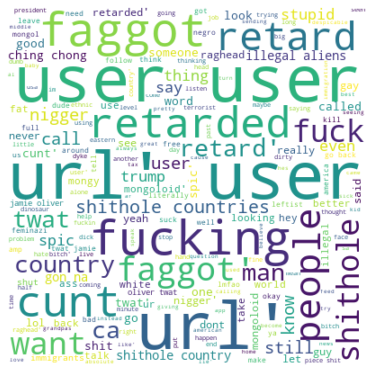

In [26]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = tweets.tweet.values
generate_word_cloud(tweets_text)

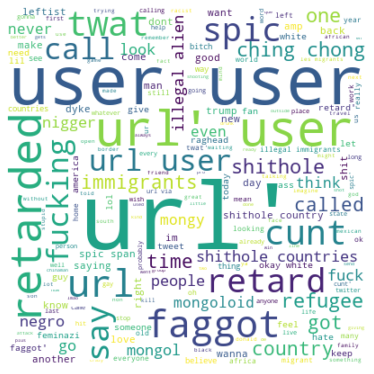

In [27]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = norm.tweet.values
generate_word_cloud(tweets_text)

In [ ]:
set(data.text)

{'@abbieharveyy @elliewoodx1 @olliedolan7 not even messing my legs are fucking killing me after doin gymnastics',
 'i can\'t stand these "grown" ass females &#129318;&#127997;\u200d♀️&#129318;&#127997;\u200d♀️ how you " grown " but childish as hell ?! &#128553;&#128514;&#129318;&#127997;\u200d♀️&#129318;&#127997;\u200d♀️',
 '@billyhalford1 @Morgan_Roseeeee Ahh here we fucking go &#128514;&#128514;',
 'the LGBTQ reference in the new power rangers movie was too relatable and made me shed a tear, SO GREAT',
 'Gothic Fairy with Pet Dragon 22inch Statue Stunning!! https://t.co/fAHc4KqvOP https://t.co/BN5ec7iFmp',
 "If he gets bullied I'm going to fucking hit the director https://t.co/cgAeDLKGla",
 'Full Video: https://t.co/oeNGOE7lcH Frolic blonde with pigtails and shaved s... &#128123;Add me on snapchat: imsophie95 &#128123; https://t.co/doUkfCCBOu',
 'There is some Pretty Pumped Folks in the Launch of the EAS so what they Excitements about https://t.co/bAKmfjMoc1 https://t.co/9AMBW34rXK',

In [28]:
hateful = data[data['sentiment']=="hateful"]
hateful['tweet'] = hateful['tweet'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


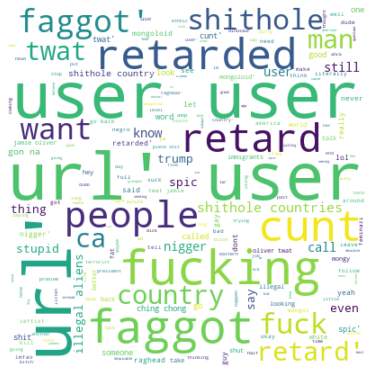

In [29]:
hate_speech = hateful['tweet'].values
generate_word_cloud(hate_speech)

In [30]:
hateful.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
24,25,mongoloid ordered dozen donuts called back see...,hateful,direct,indifference_disgust,origin,individual
52,53,user user coincidentally timed caravan love co...,hateful,indirect,anger_shock,origin,immigrants
67,68,wish could around see one rule world one day b...,hateful,indirect,sadness_indifference,origin,other
80,81,user okay giving benefits illegal aliens ary o...,hateful,indirect,anger_sadness,origin,immigrants
96,97,baby knows potus mongoloid,hateful,indirect,anger_sadness,disability,other


In [31]:
normal = data[data['sentiment']=="normal"]
normal['tweet'] = normal['tweet'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


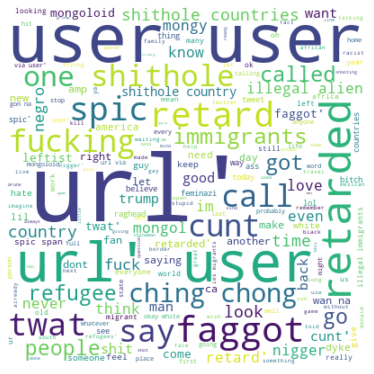

In [32]:
normaltxt = normal['tweet'].values
generate_word_cloud(normaltxt)

In [33]:
normal.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
15,16,dope new gospel lighter flick soul beat win fi...,normal,indirect,shock_disgust,origin,other
19,20,user ok maybe send finished,normal,indirect,anger_sadness,other,other
29,30,user user btw allowed say shithole countries a...,normal,indirect,anger_sadness,origin,other
40,41,box pencil mongol pencil case na may blessing ...,normal,indirect,shock_indifference,other,other
54,55,user mean platonic dyke way url,normal,indirect,anger_sadness_shock_indifference_disgust,sexual_orientation,gay


In [34]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [36]:
word = basic_clean(''.join(str(data['tweet'].tolist())))

an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

In [37]:
bigrams_series = (pd.Series(nltk.ngrams(word, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

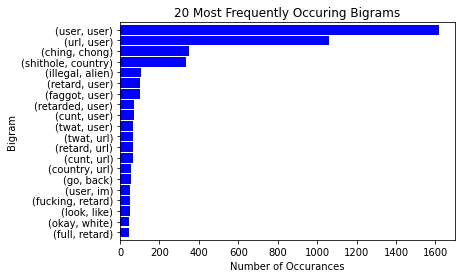

In [38]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')

Text(0.5, 0, 'Number of Occurances')

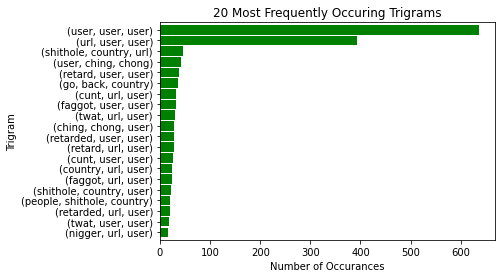

In [39]:
trigrams_series = (pd.Series(nltk.ngrams(word, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Number of Occurances')

In [44]:
#a basic model
x_train, x_test, y_train, y_test = train_test_split(data['tweet'], data.sentiment,
shuffle=False, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [45]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 51.33%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
print(confusion_matrix(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(classification_report(y_test, prediction))

                                                 precision    recall  f1-score   support

                                        abusive       0.00      0.00      0.00         1
                          abusive_disrespectful       0.00      0.00      0.00        11
           abusive_disrespectful_hateful_normal       0.00      0.00      0.00         1
                                abusive_hateful       0.00      0.00      0.00        17
                                 abusive_normal       0.00      0.00      0.00         6
                              abusive_offensive       0.00      0.00      0.00        21
 abusive_offensive_disrespectful_hateful_normal       0.00      0.00      0.00         4
         abusive_offensive_disrespectful_normal       0.00      0.00      0.00         1
        abusive_offensive_hateful_disrespectful       0.00      0.00      0.00         2
 abusive_offensive_hateful_disrespectful_normal       0.00      0.00      0.00         9
               abusi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


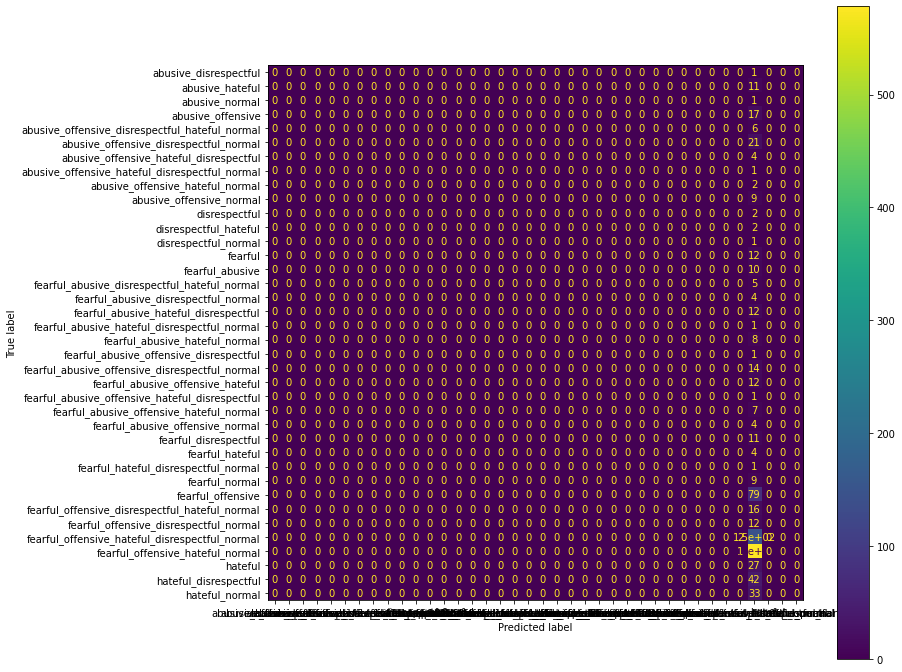

In [48]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(model,x_test,y_test, ax=ax)
plt.show()